In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
# Model Building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
dataset = pd.read_csv('/content/email.csv')
dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
dataset.shape

(5573, 2)

In [ ]:
dataset = dataset.drop_duplicates(keep ='first')

In [ ]:
counts = dataset["Category"].value_counts()

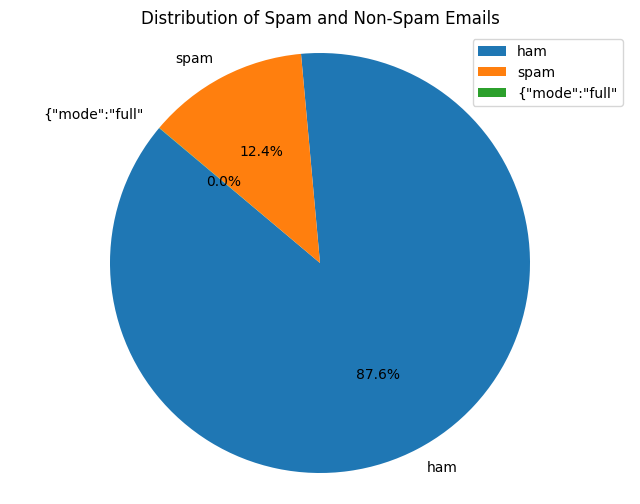

In [ ]:
#plotting
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.legend()
plt.title("Distribution of Spam and Non-Spam Emails")
plt.show()

Since there are many more non-spam emails, the model might become biased and miss some spam emails. To fix this, we need to use special techniques when training and testing our model

Average Length of Spam Emails: 137.1185647425897
Average Length of Ham Emails: 70.86935341009743


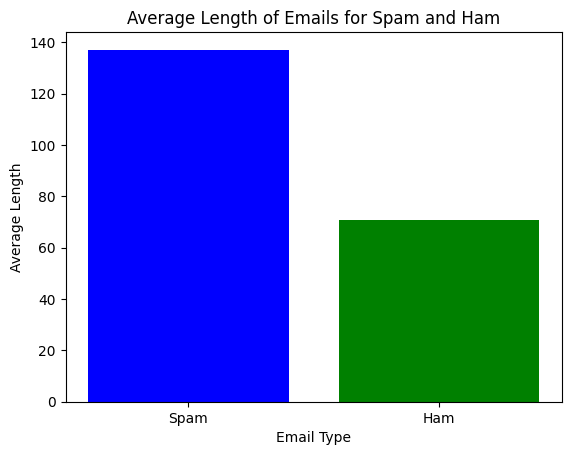

In [ ]:
dataset['Length'] = dataset['Message'].apply(len)
dataset.head(2)
avg_length_spam = dataset[dataset['Category'] == 'spam']['Length'].mean()
avg_length_ham = dataset[dataset['Category'] == 'ham']['Length'].mean()
#plotting
print("Average Length of Spam Emails:", avg_length_spam)
print("Average Length of Ham Emails:", avg_length_ham)
plt.bar(['Spam', 'Ham'], [avg_length_spam, avg_length_ham], color=['Blue', 'green'])
plt.title('Average Length of Emails for Spam and Ham')
plt.xlabel('Email Type')
plt.ylabel('Average Length')
plt.show()

This means that spam emails tend to be more wordy and detailed, possibly because they’re trying to grab your attention with lots of information. Regular emails, like the ones you get from friends or for work, are usually shorter and to the point.

Before building machine learning models, we preprocess the email data to convert it into a suitable format for analysis. This involves tasks such as lowercasing, tokenization, removing special characters, stopwords, and punctuation, as well as stemming to reduce words to their root forms.


In [ ]:
dataset['root'] = dataset['Message'].apply(str.lower)
dataset["tokenized"] = dataset['root'].apply(word_tokenize)
dataset['tokenized'] = dataset['tokenized'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])
stop_words = set(stopwords.words('english'))
dataset['tokenized'] = dataset['tokenized'].apply(lambda x:[word for word in x if word not in stop_words])
#also removes white space
dataset['tokenized'] = dataset['tokenized'].apply(lambda x:[word for word in x if word.isalnum()])
dataset.head()

,Category,Message,Length,root,tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",111,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"nah i don't think he goes to usf, he lives aro...","[nah, nt, think, goes, usf, lives, around, tho..."


In [ ]:
encoder = LabelEncoder()
dataset['Category'] = encoder.fit_transform(dataset['Category'])
dataset.head()


,Category,Message,Length,root,tokenized
0,0,"Go until jurong point, crazy.. Available only ...",111,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"nah i don't think he goes to usf, he lives aro...","[nah, nt, think, goes, usf, lives, around, tho..."


In [ ]:
dataset['tokenized'] = dataset['tokenized'].apply(lambda x: ' '.join(x))
dataset.head()


,Category,Message,Length,root,tokenized
0,0,"Go until jurong point, crazy.. Available only ...",111,"go until jurong point, crazy.. available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,u dun say so early hor... u c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"nah i don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though


In [ ]:
dataset.shape

(5158, 5)

In [ ]:
vectoriser = TfidfVectorizer()
X = vectoriser.fit_transform(dataset['tokenized']).toarray()
y = dataset['Category']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# MODEL TRAINING

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
model_1 = SVC(kernel='linear')
model_1.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_hat = model_1.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_hat)
print(f"Accuracy: {accuracy}")

clf_report = classification_report(y_test, y_hat)
print(f"Classification Report:\n{clf_report}")


Accuracy: 0.9738372093023255
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       887
           1       0.96      0.85      0.90       145

    accuracy                           0.97      1032
   macro avg       0.97      0.92      0.94      1032
weighted avg       0.97      0.97      0.97      1032



In [ ]:
def predict_email(email):
    # Convert email into numerical vector using the trained TF-IDF vectorizer
    email_vector = vectoriser.transform([email])

    # Convert sparse matrix to dense array
    email_vector_dense = email_vector.toarray()

    # Use the trained SVM model to make predictions
    prediction = model_1.predict(email_vector_dense)

    # Print the prediction
    if prediction[0] == 1:
        print("The email is predicted as spam.")
    else:
        print("The email is predicted as ham.")

# Get user input for email
user_email = input("Enter the email text: ")

# Predict whether the input email is spam or ham
predict_email(user_email)

Enter the email text: Subscribe and get iPhone now!
The email is predicted as ham.
